In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Problem Definition
We are predicting doctor's consultation fee onn the basis of various attributes .

FEATURES:

1. Qualification: Qualification and degrees held by the doctor

2. Experience: Experience of the doctor in number of years

3. Rating: Rating given by patients

4. Profile: Type of the doctor

5. Miscellaeous_Info: Extra information about the doctor

6. Fees: Fees charged by the doctor

7. Place: Area and the city where the doctor is located.

In [2]:
df=pd.read_csv('Final_test.csv',sep='\t' )
df


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


# EDA for Test Data

In [3]:
df.shape #checking the rows and ccolumns count

(1987, 6)

In [4]:
df.columns #checking various columns 

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [5]:
df.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
count,1987,1987,897,1981,1987,1153
unique,630,57,36,592,6,1084
top,BAMS,10 years experience,100%,"Mulund West, Mumbai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...
freq,153,110,223,27,444,10


key observations here

1. Count is not same in all columns .Means data is having missing values .

In [6]:
df.dtypes  # checking the data types of columns 

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [7]:
df.isnull().sum() # checking for null values 

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

<AxesSubplot:>

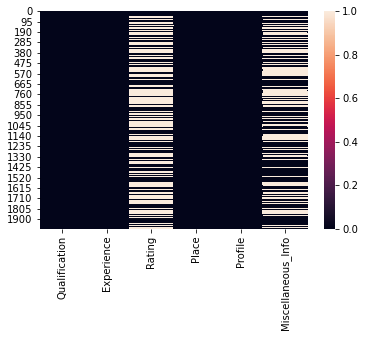

In [8]:
sns.heatmap(df.isnull())

There are null values in column  Rating, Place, Misc_Info  

Key Obseravtions here
1. Data is not numerical. 
2. nominal values are alphanumeric also.
So, One by one we will try to extract the relevant values from each variable.

In [9]:
 #Extracting Experience Year from Experience column and convert to Numeric.
# Experience
df['Experience'] = df['Experience'].str.split().str[0]
df['Experience'] = df['Experience'].astype(int)

Now, Rating column has % symbols. and having null values too.
1. Remove % symbols.
2. Changing the null values to -99. Putting values 0 will not serve the purpose and give a negative view having 0 ratings

In [10]:
df['Rating'].fillna('-99%',inplace=True) # filling the null values 

In [11]:
for i in df['Rating'].value_counts().index:
    df['Rating'].replace(i,int(i[:-1]),inplace=True)

Steps to be followed for extracting Qualification info
1. Repeated values in all entries. like MBBS.So making a qualification count
2. comma and space sepeartd values to be handled . And Extracting top 10 qualifications
3. we will make specific columns for all top degrees which most of the rows carry.
4. will drop old Qualification and count column

In [12]:
df['Qualification_count'] = df['Qualification'].apply(lambda x: len(x.split(",")))

df['Qualification_count'].value_counts()

2     889
1     609
3     366
4      87
5      28
6       5
17      1
9       1
7       1
Name: Qualification_count, dtype: int64

In [13]:
df['Qualification'].unique()

array(['MBBS', 'MBBS, Diploma in Otorhinolaryngology (DLO)', 'MBBS, DDVL',
       'BAMS', 'BDS, MDS - Conservative Dentistry & Endodontics',
       'BDS, MDS', 'BDS, MDS - Pedodontics',
       'MD - Ayurveda Medicine, BAMS, Yoga Teachers Training Course, M. D. IN KAYACHIKISTA',
       'BHMS', 'BDS', 'MBBS, FCD - Diabetology', 'MBBS, DDV',
       'MBBS, MD - Dermatology', 'MS - ENT',
       'MBBS, Diploma in Otorhinolaryngology (DLO), MS - ENT, DNB - ENT, MNAMS (Membership of the National Academy)',
       'BHMS, Diploma in Naturopathy & Yogic Science (DNYS), Diploma in Diet and Nutrition, Diploma in Cosmetology',
       'MBBS, PG Diploma In Clinical Cosmetology (PGDCC)',
       'BDS, MDS - Periodontics', 'BDS, MDS- Oral Pathology',
       'MBBS, MD - General Medicine', 'MS - ENT, MBBS',
       'MBBS, Diploma in Otorhinolaryngology (DLO), DNB - ENT',
       'MBBS, MS - ENT, DNB - Otorhinolaryngology',
       'BDS, PhD - Endodontics, MDS - Conservative Dentistry & Endodontics',
       'B

In [14]:
# Extracting all the  qualification with there counts
df["Qualification"]=df["Qualification"].str.split(",")
Qual ={}
for i in df["Qualification"].values:
    for j in i:
        j = j.strip()
        if j in Qual:
            Qual[j]+=1
        else:
            Qual[j]=1
            

In [15]:
#Extracting  top 10 qualification
top_qual = sorted(Qual.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual = []
for qual in top_qual:
    final_qual.append(qual[0])
    
print(final_qual)

['MBBS', 'BDS', 'BHMS', 'BAMS', 'MD - Dermatology', 'MS - ENT', 'MD - General Medicine', 'Venereology & Leprosy', 'Diploma in Otorhinolaryngology (DLO)', 'DDVL']


In [16]:
for qual in final_qual:
    df[qual] = 0

for x,y in zip(df['Qualification'].values, np.array([i for i in range(len(df))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            df[c][y] = 1

In [17]:
# Now we can drop the original qualificaton column and count column which we added 
df.drop(['Qualification','Qualification_count'],axis=1,inplace=True)

In [18]:
df.head(5)

,Experience,Rating,Place,Profile,Miscellaneous_Info,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL
0,35,-99,"Ghatkopar East, Mumbai",General Medicine,NaN,1,0,0,0,0,0,0,0,0,0
1,31,-99,"West Marredpally, Hyderabad",ENT Specialist,NaN,1,0,0,0,0,0,0,0,1,0
2,40,70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",1,0,0,0,0,0,0,0,0,1
3,0,-99,"New Ashok Nagar, Delhi",Ayurveda,NaN,0,0,0,1,0,0,0,0,0,0
4,16,100,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,0,1,0,0,0,0,0,0,0,0


Now , Place column.
1. It has comma seperated city and area names. which we can seperate and make 2 columns 
2. It has null values . we will assign unknown to them.

In [19]:
df.Place.fillna('Unknown,Unknown',inplace=True)

df['Area'] = df['Place'].str.split(",").str[0]
df['City'] = df['Place'].str.split(",").str[1]

#dropping  the place variable after splitting it in City and Area
df.drop('Place',axis=1,inplace=True)

In [20]:
df["Area"].value_counts()

Andheri West      27
Mulund West       27
Dwarka            26
Whitefield        23
HSR Layout        22
                  ..
Abhiramapuram      1
Mira Bhayandar     1
Palarivattom       1
Nedumbassery       1
Mulund             1
Name: Area, Length: 590, dtype: int64

In [21]:
df["City"].value_counts()

 Bangalore             420
 Delhi                 417
 Mumbai                389
 Hyderabad             333
 Chennai               287
 Coimbatore             70
 Ernakulam              48
 Thiruvananthapuram     17
Unknown                  6
Name: City, dtype: int64

In [22]:
df.Profile.value_counts() # 

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64

Last comes is Misc_Info column. 
1. this column contains lots of information but very messy and having null values also
2. Information in this column is somehow can be seen in some of rows 
Dropping this column.

In [23]:
df.drop(["Miscellaneous_Info"],axis=1,inplace=True)

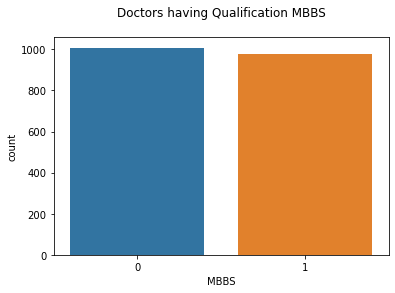

In [24]:
sns.countplot(df["MBBS"])
plt.title("Doctors having Qualification MBBS\n ")
plt.show() 

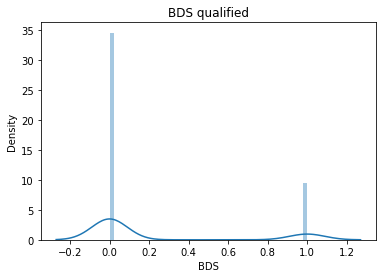

In [25]:
plt.title("BDS qualified")
sns.distplot(df["BDS"])
plt.show() # shows very less are BDS Qualified

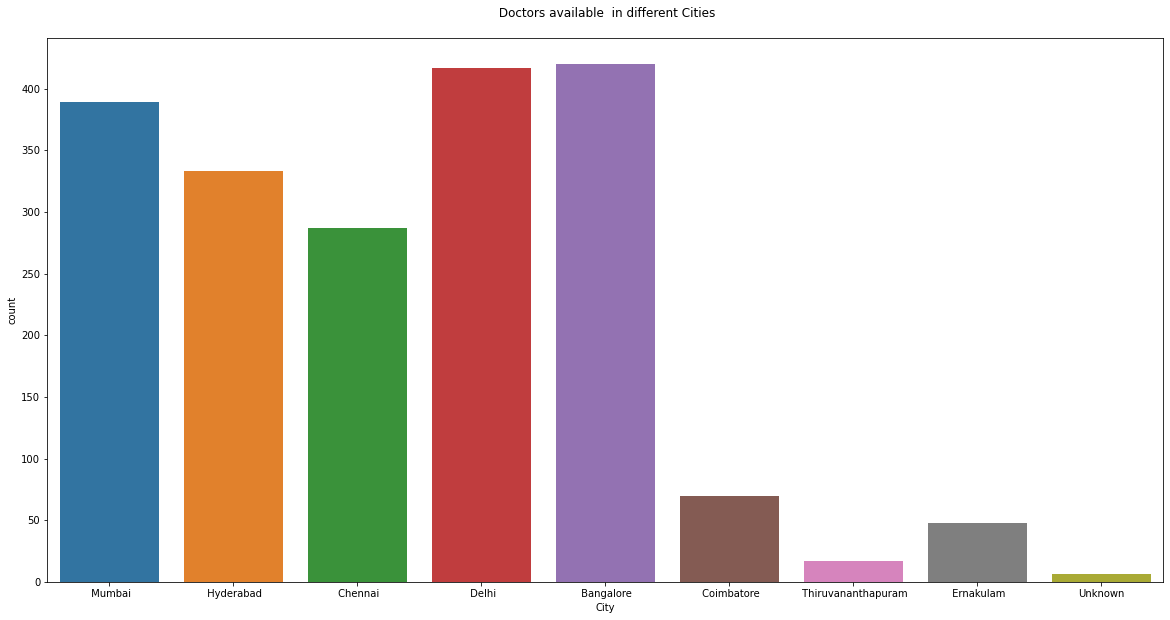

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(df["City"])
plt.title(" Doctors available  in different Cities\n")
plt.show() # shows list has max no of doctors from Delhi and banglore. 
#then Mumbai,Hyderabad,Chennai and so on

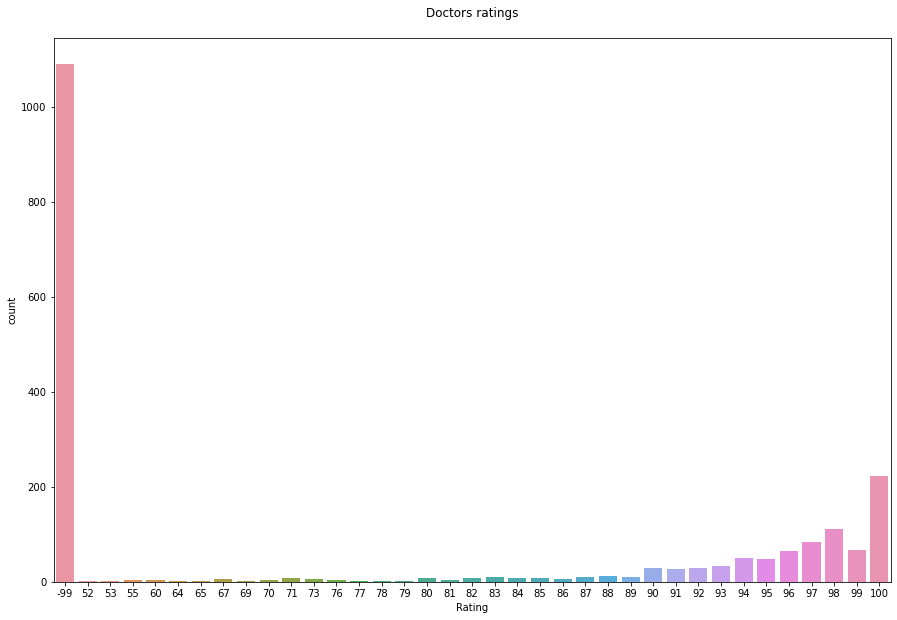

In [27]:
plt.figure(figsize=(15,10))
plt.title("Doctors ratings\n")
sns.countplot(df["Rating"])
plt.show()

# Handling the outliers


<AxesSubplot:>

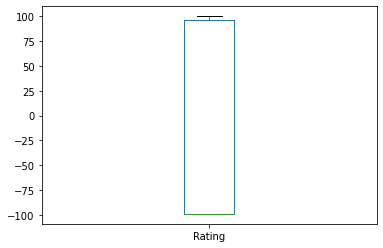

In [28]:
df["Rating"].plot.box()

<AxesSubplot:>

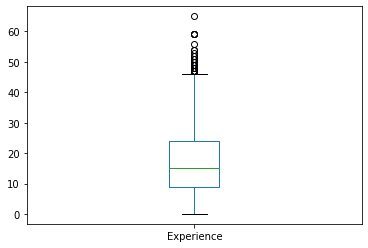

In [29]:
df["Experience"].plot.box()

# Changing the nominal values  to numerical

Profile column has 6 values which can later be label encoded 

In [30]:
df.Profile.value_counts()

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [32]:
list1=['Profile','Area','City']
for i in list1:
    df[i]=le.fit_transform(df[i])
df.head(5)

,Experience,Rating,Profile,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL,Area,City
0,35,-99,4,1,0,0,0,0,0,0,0,0,0,142,6
1,31,-99,3,1,0,0,0,0,0,0,0,1,0,578,5
2,40,70,2,1,0,0,0,0,0,0,0,0,1,212,1
3,0,-99,0,0,0,0,1,0,0,0,0,0,0,373,3
4,16,100,1,0,1,0,0,0,0,0,0,0,0,231,0


In [33]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.50699229, 0.90589339, 0.90167305, ..., 0.18680426, 0.85257303,
        1.30119179],
       [1.15500055, 0.90589339, 0.29700739, ..., 0.18680426, 1.66117238,
        0.86193456],
       [1.94698195, 0.84725885, 0.30765827, ..., 5.35319684, 0.44899005,
        0.89509439],
       ...,
       [0.78095398, 0.90589339, 0.90167305, ..., 0.18680426, 0.76752436,
        0.89509439],
       [0.51696018, 1.13772194, 0.91232393, ..., 0.18680426, 1.52136769,
        1.33435162],
       [0.86895191, 0.90589339, 0.30765827, ..., 0.18680426, 0.59456022,
        0.89509439]])

In [34]:
threshold=3
print(np.where(z>3))

(array([   1,    2,    6,   13,   14,   16,   17,   17,   19,   22,   25,
         28,   29,   32,   33,   34,   46,   48,   51,   57,   59,   65,
         65,   66,   71,   73,   76,   79,   81,   82,   91,   96,   99,
        102,  104,  106,  114,  119,  119,  124,  129,  133,  135,  135,
        138,  141,  141,  143,  152,  166,  168,  168,  171,  174,  174,
        179,  179,  181,  187,  195,  201,  207,  211,  221,  221,  224,
        225,  227,  229,  229,  231,  232,  237,  239,  240,  244,  251,
        251,  253,  253,  254,  256,  258,  258,  260,  261,  261,  262,
        262,  264,  269,  269,  271,  273,  276,  279,  280,  292,  309,
        313,  315,  317,  319,  321,  322,  323,  323,  327,  330,  337,
        338,  341,  347,  349,  352,  362,  363,  367,  367,  371,  372,
        374,  377,  382,  388,  388,  391,  396,  398,  399,  401,  404,
        408,  408,  417,  420,  423,  423,  427,  430,  434,  435,  436,
        437,  438,  450,  450,  454,  460,  462,  

In [35]:
df_new=df[(z<3).all(axis=1)]
df_new

,Experience,Rating,Profile,MBBS,BDS,BHMS,BAMS,MD - Dermatology,MS - ENT,MD - General Medicine,Venereology & Leprosy,Diploma in Otorhinolaryngology (DLO),DDVL,Area,City
0,35,-99,4,1,0,0,0,0,0,0,0,0,0,142,6
3,0,-99,0,0,0,0,1,0,0,0,0,0,0,373,3
4,16,100,1,0,1,0,0,0,0,0,0,0,0,231,0
5,14,90,1,0,1,0,0,0,0,0,0,0,0,553,1
7,9,94,1,0,1,0,0,0,0,0,0,0,0,31,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,17,100,1,0,1,0,0,0,0,0,0,0,0,424,6
1980,18,98,1,0,1,0,0,0,0,0,0,0,0,553,1
1982,10,-99,0,0,0,0,1,0,0,0,0,0,0,58,0
1984,9,-99,4,1,0,0,0,0,0,0,0,0,0,423,1


In [36]:
df_new.shape,df.shape

((1429, 15), (1987, 15))

550 rows or 25% of data will be lost if we remove outliers. so deciding not to remove them due to huge loss of data

In [37]:
# scaling the dataset

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_df=sc.fit_transform(df)
scaled_df.shape

(1987, 15)

# All EDA and preprocessing has been done on test dataset. After data modelling done on Train dataset we will use this test dataset for prediction in the end ,at the time of conclusion

# EDA for train dataset

In [39]:
ds=pd.read_csv("Final_train.csv",sep='\t')
ds

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [40]:
ds.dtypes # checking the data types of columns 

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [41]:
ds.columns #checking various columns 

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [42]:
ds.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


key observations here

1. mean and median is very near .
2. There is huge differnece in 75% and max values means few outliers are there
3. Count is same as no. of rows.  means no missing values in this column 

In [43]:
ds.shape  #checking the rows and ccolumns count

(5961, 7)

In [44]:
ds.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

<AxesSubplot:>

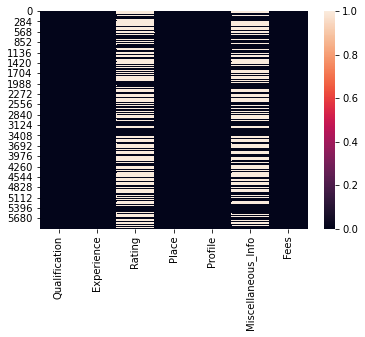

In [45]:
sns.heatmap(ds.isnull()) # checking the null values 

In [46]:
dscor=ds.corr() # checking the correlation
dscor # only one numerical column . so no correlation

,Fees
Fees,1.0


Key Obseravtions till here
1. Data is not numerical. 
2. nominal values are alphanumeric also.
So, One by one we will try to extract the relevant values from each variable.

In [47]:
 #Extracting Experience Year from Experience column and convert to Numeric.
# Experience
ds['Experience'] = ds['Experience'].str.split().str[0]
ds['Experience'] = ds['Experience'].astype(int)

Now, Rating column has % symbols. and having null values too.
1. Remove % symbols.
2. Changing the null values to -99. Putting values 0 will not serve the purpose and give a negative view having 0 ratings

In [48]:
ds['Rating'].fillna('-99%',inplace=True) # filling the null values 

In [49]:
for i in ds['Rating'].value_counts().index:
    ds['Rating'].replace(i,int(i[:-1]),inplace=True)

Steps to be followed for extracting Qualification info
1. Repeated values in all entries. like MBBS.So making a qualification count
2. comma and space sepeartd values to be handled . And Extracting top 10 qualifications
3. we will make specific columns for all top degrees which most of the rows carry.
4. will drop old Qualification and count column

In [50]:
ds['Qualification_count'] = ds['Qualification'].apply(lambda x: len(x.split(",")))

ds['Qualification_count'].value_counts()

2     2628
1     1962
3      995
4      257
5       84
6       23
7        6
9        3
8        2
10       1
Name: Qualification_count, dtype: int64

In [51]:
ds['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [52]:
# Extracting all the  qualification with there counts
ds["Qualification"]=ds["Qualification"].str.split(",")
Qual ={}
for i in ds["Qualification"].values:
    for j in i:
        j = j.strip()
        if j in Qual:
            Qual[j]+=1
        else:
            Qual[j]=1
            

In [53]:
#Extracting  top 10 qualification
top_qual = sorted(Qual.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual = []
for qual in top_qual:
    final_qual.append(qual[0])
    
print(final_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [54]:
for qual in final_qual:
    ds[qual] = 0

for x,y in zip(ds['Qualification'].values, np.array([i for i in range(len(ds))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            ds[c][y] = 1

In [55]:
# Now we can drop the original qualificaton column and count column which we added 
ds.drop(['Qualification','Qualification_count'],axis=1,inplace=True)

In [56]:
ds.head(5)

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,0,0,0,0,1
1,12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,0,0,0,0,0
2,9,-99,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,1,0,0,0,0,0,0,0,0,0
3,12,-99,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,0,0,0,0,0
4,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,0,0,0,0,0


Now , Place column.
1. It has comma seperated city and area names. which we can seperate and make 2 columns 
2. It has null values . we will assign unknown to them.

In [57]:
ds.Place.fillna('Unknown,Unknown',inplace=True)

ds['Area'] = ds['Place'].str.split(",").str[0]
ds['City'] = ds['Place'].str.split(",").str[1]

#dropping  the place variable after splitting it in City and Area
ds.drop('Place',axis=1,inplace=True)

In [58]:
ds["Area"].value_counts()

HSR Layout        75
Andheri West      70
Dwarka            68
Banjara Hills     64
Mulund West       54
                  ..
Austin Town        1
Pezhakkappilly     1
Shanti Niketan     1
Geeta Colony       1
Cherai             1
Name: Area, Length: 867, dtype: int64

In [59]:
ds["City"].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Unknown                  25
 Sector 5                 1
Name: City, dtype: int64

In [60]:
ds["City"].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', 'Unknown',
       ' Sector 5', nan], dtype=object)

some observations here:
1. City has extra spaces . we will remove them.
2. City contains invalid enties too. like sector 5 and nan.
3. at loc 2169,City should be delhi in spite of sector 5. we will change it.
4. at loc 3980,area is e and city is nan. so we will change it to Unknown

In [61]:
# remove the extra spaces before the city
import re
ds['City'] = ds['City'].apply(lambda x: re.sub(' +','',str(x)))

In [62]:
# finding the improper data
ds[(ds['City'] == "nan") | (ds['City'] == "Sector5")]

,Experience,Rating,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,Area,City
2169,11,-99,Dentist,NaN,250,0,1,0,0,0,0,0,0,0,0,Dwarka,Sector5
3980,23,-99,Dentist,NaN,250,0,1,0,0,0,0,0,0,0,0,e,nan


In [63]:
# step 3 and 4 of observation
ds['City'] = np.where(ds['City']=="Sector5","Delhi", ds['City'])

#nan
ds['City'].loc[3980] = "Unknown"
ds['Area'].loc[3980] = "Unknown"

In [64]:
ds.head(5)

,Experience,Rating,Profile,Miscellaneous_Info,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,Area,City
0,24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,0,0,0,1,0,0,0,0,0,1,Kakkanad,Ernakulam
1,12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,0,0,1,0,0,0,0,0,0,0,Whitefield,Bangalore
2,9,-99,ENT Specialist,NaN,300,1,0,0,0,0,0,0,0,0,0,Mathikere - BEL,Bangalore
3,12,-99,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,0,0,1,0,0,0,0,0,0,0,Bannerghatta Road,Bangalore
4,20,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,0,0,1,0,0,0,0,0,0,0,Keelkattalai,Chennai


Last comes is Misc_Info column. 
1. this column contains lots of information but very messy and having null values also
2. Information in this column is somehow can be seen in some of rows 
Dropping this column.

In [65]:
ds.drop(["Miscellaneous_Info"],axis=1,inplace=True)

# Univariate and Bivariate Analysis

In [66]:
#univariate analysis

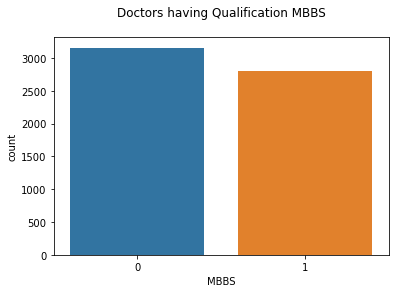

In [67]:
sns.countplot(ds["MBBS"])
plt.title("Doctors having Qualification MBBS\n ")
plt.show() 

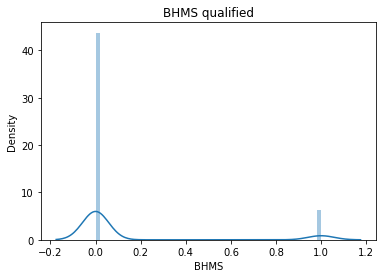

In [68]:
plt.title("BHMS qualified")
sns.distplot(ds["BHMS"])
plt.show() # shows very less are BDS Qualified

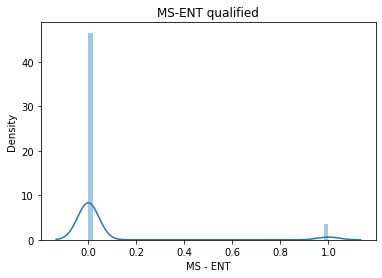

In [69]:
plt.title("MS-ENT qualified")
sns.distplot(ds["MS - ENT"])
plt.show() # shows very less are ENT specialist

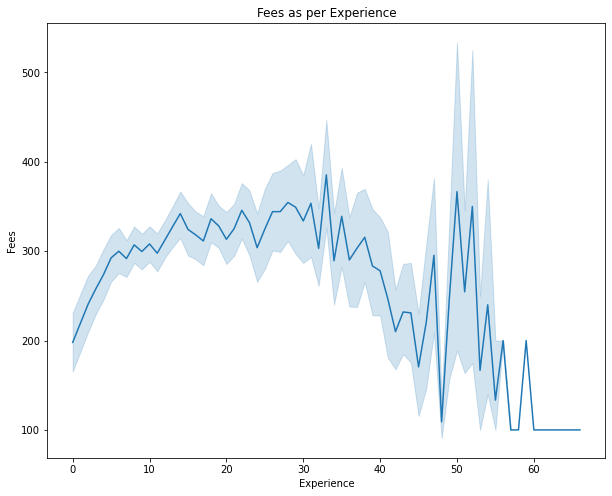

In [70]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Experience',y='Fees',data=ds)
ax.set_title("Fees as per Experience")
plt.show()

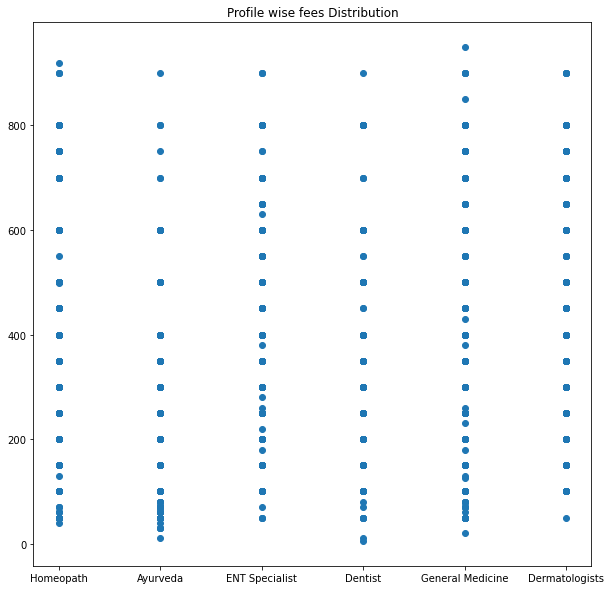

In [71]:
plt.figure(figsize=(10,10))
plt.title('Profile wise fees Distribution')
plt.scatter(ds['Profile'],ds['Fees'])
plt.show()

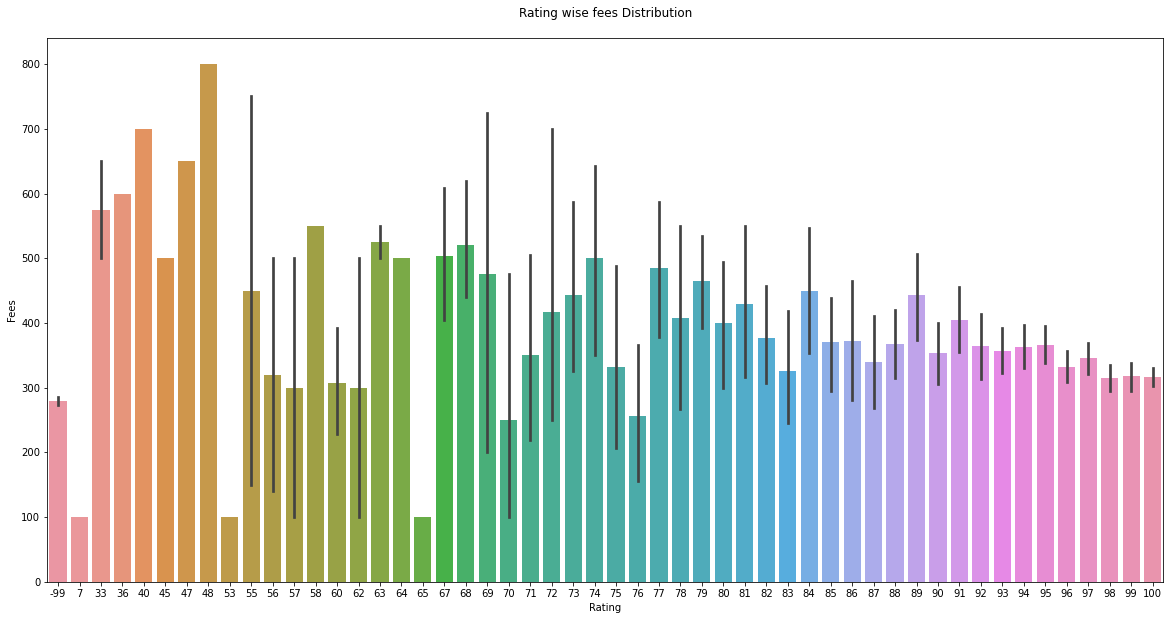

In [72]:
plt.figure(figsize=(20,10))
plt.title('Rating wise fees Distribution\n')
sns.barplot(ds['Rating'],ds['Fees'])
plt.show() # shows the fees is max when the rating is near 48%

Text(0.5, 1.0, 'No of doctors having rating more than 70 \n')

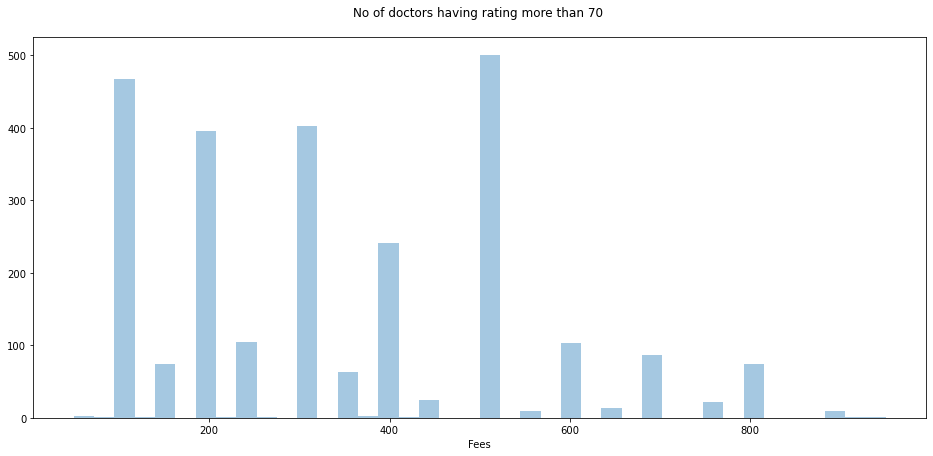

In [73]:
plt.figure(figsize=(16,7))
sns.distplot(ds[ds['Rating']>70]['Fees'],kde=False,bins=40)
plt.title('No of doctors having rating more than 70 \n')

Text(0.5, 1.0, 'No of doctors having Experience more than 30 years \n')

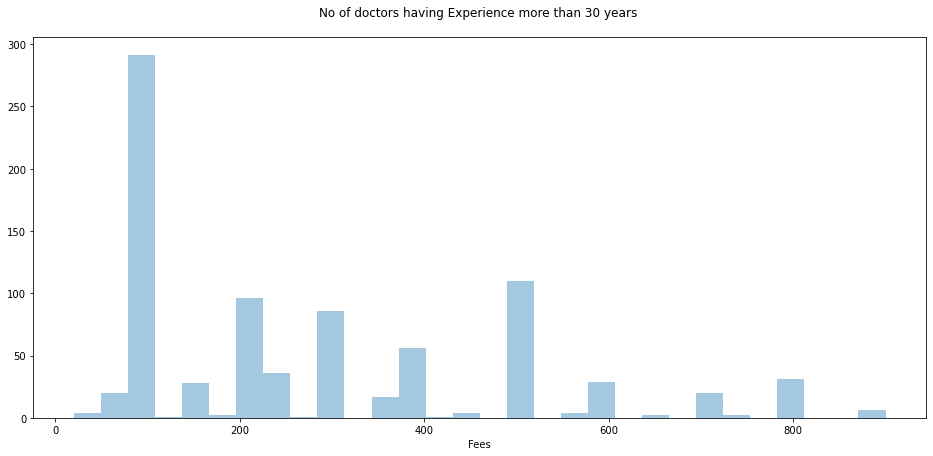

In [74]:
plt.figure(figsize=(16,7))
sns.distplot(ds[ds['Experience']>30]['Fees'],kde=False,bins=30)
plt.title('No of doctors having Experience more than 30 years \n')

# Changing the nominal values  to numerical

Profile column has 6 values which can later be label encoded 

In [75]:
ds.Profile.value_counts() # 

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [76]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [77]:
list1=['Profile','Area','City']
for val in list1:
    ds[val]=le.fit_transform(ds[val].astype(str))
ds.head(5)

,Experience,Rating,Profile,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy,Area,City
0,24,100,5,100,0,0,0,1,0,0,0,0,0,1,296,4
1,12,98,0,350,0,0,1,0,0,0,0,0,0,0,856,0
2,9,-99,3,300,1,0,0,0,0,0,0,0,0,0,452,0
3,12,-99,0,250,0,0,1,0,0,0,0,0,0,0,68,0
4,20,100,0,250,0,0,1,0,0,0,0,0,0,0,335,1


# Handling the outliers¶

<AxesSubplot:>

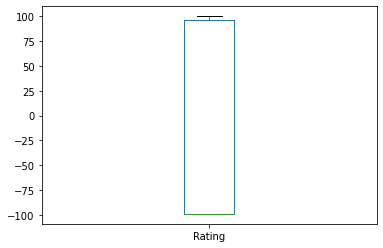

In [78]:
ds["Rating"].plot.box()

<AxesSubplot:>

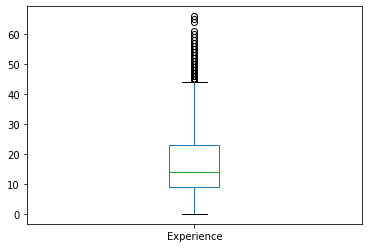

In [79]:
ds["Experience"].plot.box()

<AxesSubplot:>

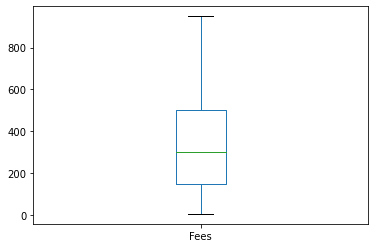

In [80]:
ds["Fees"].plot.box()

In [81]:
from scipy.stats import zscore

In [82]:
z=np.abs(zscore(ds))

In [83]:
threshold=3
print(np.where(z>3))

(array([   0,    8,   14, ..., 5955, 5956, 5959]), array([13, 11, 12, ..., 13,  9, 11]))


In [84]:
ds_new=ds[(z<3).all(axis=1)]
ds_new.shape,  ds.shape

((4569, 16), (5961, 16))

1500 rows or 25% of data will be lost if we remove outliers. so deciding not to remove them due to huge loss of data

In [85]:
x=ds.drop(columns=['Fees'])

In [86]:
y=pd.DataFrame(ds['Fees'])

In [87]:
x.shape,  y.shape

((5961, 15), (5961, 1))

In [88]:
ds.skew()

Experience                              0.991089
Rating                                  0.225184
Profile                                 0.108803
Fees                                    0.751870
MBBS                                    0.118000
BDS                                     1.293695
BAMS                                    2.229777
BHMS                                    2.261706
MD - Dermatology                        2.639954
MS - ENT                                3.403459
Venereology & Leprosy                   4.171950
MD - General Medicine                   4.239699
Diploma in Otorhinolaryngology (DLO)    4.581912
MD - Homeopathy                         5.475409
Area                                    0.109032
City                                    0.010640
dtype: float64

little skewness is there so we will remove it

In [89]:
from sklearn.preprocessing import power_transform

In [90]:
x=power_transform(x,method='yeo-johnson')

#scaling the dataset

In [91]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
x_t.shape

(5961, 15)

In [92]:
# finding the best random state

In [93]:
# importing our model libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [94]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.22,random_state=0)

In [96]:
x_train.shape

(4649, 15)

In [97]:
x_test.shape

(1312, 15)

In [98]:
y_train.shape

(4649, 1)

In [99]:
y_test.shape

(1312, 1)

# Finding the best model


In [100]:
#using algorithms in for loops
model=[DecisionTreeRegressor(),RandomForestRegressor(),BaggingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print("Score is ",m.score(x_train,y_train))
    print('RMSLE:Root Mean Squared LogError for ' ,m , ' is ', np.sqrt(mean_squared_log_error(y_test, y_pred)))
    print("Root mean Squared error for  is \n",np.sqrt(mean_squared_error(y_test,y_pred)))
    print("**********************************************************************\n")

Score is  0.9959304603277528
RMSLE:Root Mean Squared LogError for  DecisionTreeRegressor()  is  0.8602824365466738
Root mean Squared error for  is 
 244.54794223939615
**********************************************************************

Score is  0.8795124549875482
RMSLE:Root Mean Squared LogError for  RandomForestRegressor()  is  0.6486892618817182
Root mean Squared error for  is 
 179.3839072068614
**********************************************************************

Score is  0.8332682039597133
RMSLE:Root Mean Squared LogError for  BaggingRegressor()  is  0.6638045420188712
Root mean Squared error for  is 
 186.53170175462753
**********************************************************************



As DecisionTreeRegressor is giving 99% score. But  rmse high . I will continue with RandomForestRegressor

# hyperparameter tuning

In [101]:
# randomForestRegressor is best performing model so finding its best parameter
from sklearn.model_selection import GridSearchCV

In [102]:
# Create the parameter grid based on the results of random search 
param_grid = {'bootstrap':[True],'criterion':['mse'] , 
              'max_features':['auto'],  'bootstrap': [True], 'max_depth': [58, 60, None], 'n_estimators': [10, 11, 12, 13, 15,20,25,29,30],'random_state':[0,11]}

In [103]:
rfr = RandomForestRegressor()
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                          cv = 5, n_jobs = -1)

In [104]:
g_search.fit(x_train, y_train);
print(g_search.best_params_)

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 58, 'max_features': 'auto', 'n_estimators': 29, 'random_state': 11}


In [105]:
rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=58,
                           max_features='auto', n_estimators= 29, random_state=11)
rf = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("Score is " , rf.score(x_train,y_train))
print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, y_pred)))
print("Root mean Squared error is \n",np.sqrt(mean_squared_error(y_test,y_pred)))
print("**********************************************************************\n")

Score is  0.8702733460554202
RMSLE: 0.650129232045552
Root mean Squared error is 
 179.80611731222504
**********************************************************************



# Conclusion

According to hackathon MachineHack,This Doctors Fee Prediction will be evaluated by RMSLE(Root MeanSquared LogError) 

# Saving the model- Serialization

In [106]:
# saving the prediction model

import pickle
filename="DoctorFee.pkl"
pickle.dump(rf,open(filename,'wb'))

In [107]:
# load the model
fitted_model=pickle.load(open("DoctorFee.pkl",'rb'))

In [108]:
fitted_model

RandomForestRegressor(max_depth=58, n_estimators=29, random_state=11)

In [109]:
# predictions over test data (final_test.csv)
predictions=fitted_model.predict(scaled_df)

In [110]:
predictions=predictions.astype(int)

In [111]:
ds_pred=pd.DataFrame(data=predictions,columns=['Fees'])
writer = pd.ExcelWriter('DoctorFee.xlsx', engine='xlsxwriter')
ds_pred.to_excel(writer,sheet_name='Sheet1', index=False)
writer.save()

In [112]:
ds_pred

,Fees
0,171
1,317
2,237
3,275
4,213
...,...
1982,202
1983,343
1984,260
1985,286
